In [1]:
import K_means_cluster_module.k_means_cluster as kmc
import global_resources as gr
# import SVM.SVC as svc
import os
import numpy as np
import torch
import pandas as pd

Reading files from: D:\ImportanFiles\Coding Related\Repositories\Quantitative-Investment-Algorithms\Data\breast-cancer-wisconsin.data
Current device: Cuda.


# Data preprocess

In [2]:
data_path = os.path.join(gr.global_paths['Data'], 'Cluster Data', 'processed_data_final.csv')
print(data_path)
df = gr.read_and_return_pd_df(data_path)
to_drop = ['证券简称', '行业代码1']
df.drop(to_drop, axis = 1, inplace = True)

D:\ImportanFiles\Coding Related\Repositories\Quantitative-Investment-Algorithms\Data\Cluster Data\processed_data_final.csv
Reading files from: D:\ImportanFiles\Coding Related\Repositories\Quantitative-Investment-Algorithms\Data\Cluster Data\processed_data_final.csv


In [3]:
df['证券代码'] = df['证券代码'].astype(str).str.zfill(6)
display(df)

,证券代码,营业总收入,现金资产比率,应收类资产比率,固定资产比率,无形资产比率,金融负债比率,少数股东权益占比,市盈率（PE）1,资产负债率,市值A,托宾Q值A,账面市值比A,资产报酬率A,净资产收益率（ROE）A
0,000001,1.294663,-0.777553,-1.270996,-1.297656,-0.692415,-1.477725,-0.185208,-0.330143,2.323068,4.379345,-0.733083,1.421790,-0.375351,0.132565
1,000002,3.324778,-0.706152,-1.208915,-1.205924,-0.608636,-0.188667,1.208350,-0.326349,1.446345,0.858528,-0.829444,1.958758,-0.737222,-0.103471
2,000004,-0.151864,0.133231,2.573513,-1.277036,-0.136708,-1.085169,-0.257693,-0.370844,0.840408,-0.068671,3.617179,-2.012428,-2.865983,-0.471754
3,000006,-0.076711,-0.165453,-1.251412,-1.287878,-0.710005,0.400996,0.012098,-0.370844,1.215474,-0.053009,-0.664129,1.108182,-1.008012,-0.196261
4,000007,-0.150626,1.671150,-0.842090,-0.384225,-0.707361,0.594283,0.100501,0.064576,0.780991,-0.068667,4.447951,-2.103008,-0.356346,0.001572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5316,920002,-0.148916,0.255536,0.050418,0.063653,-0.494292,-1.182638,-0.185208,-0.140737,-1.544378,-0.069825,-0.522023,0.592871,0.969871,0.106275
5317,920008,-0.149857,0.215799,3.219931,-0.949145,-0.670456,0.700225,-0.185208,-0.148138,-0.198913,-0.069806,0.143840,-0.678933,1.255378,0.184321
5318,920016,-0.150593,0.936079,-0.717003,0.952690,0.067164,1.518683,-0.185208,-0.019689,0.223056,-0.069697,-0.208876,-0.160995,0.756657,0.153632
5319,920099,-0.148657,1.784303,-0.655317,-1.041496,0.039194,-0.601230,-0.185208,-0.230032,0.294809,-0.069054,-0.508312,0.550499,0.700999,0.165490


In [4]:
df.dropna(inplace = True)
Stock_ID_df = df['证券代码']
df.drop(['证券代码'], axis = 1, inplace = True)
display(df)

,营业总收入,现金资产比率,应收类资产比率,固定资产比率,无形资产比率,金融负债比率,少数股东权益占比,市盈率（PE）1,资产负债率,市值A,托宾Q值A,账面市值比A,资产报酬率A,净资产收益率（ROE）A
0,1.294663,-0.777553,-1.270996,-1.297656,-0.692415,-1.477725,-0.185208,-0.330143,2.323068,4.379345,-0.733083,1.421790,-0.375351,0.132565
1,3.324778,-0.706152,-1.208915,-1.205924,-0.608636,-0.188667,1.208350,-0.326349,1.446345,0.858528,-0.829444,1.958758,-0.737222,-0.103471
2,-0.151864,0.133231,2.573513,-1.277036,-0.136708,-1.085169,-0.257693,-0.370844,0.840408,-0.068671,3.617179,-2.012428,-2.865983,-0.471754
3,-0.076711,-0.165453,-1.251412,-1.287878,-0.710005,0.400996,0.012098,-0.370844,1.215474,-0.053009,-0.664129,1.108182,-1.008012,-0.196261
4,-0.150626,1.671150,-0.842090,-0.384225,-0.707361,0.594283,0.100501,0.064576,0.780991,-0.068667,4.447951,-2.103008,-0.356346,0.001572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5316,-0.148916,0.255536,0.050418,0.063653,-0.494292,-1.182638,-0.185208,-0.140737,-1.544378,-0.069825,-0.522023,0.592871,0.969871,0.106275
5317,-0.149857,0.215799,3.219931,-0.949145,-0.670456,0.700225,-0.185208,-0.148138,-0.198913,-0.069806,0.143840,-0.678933,1.255378,0.184321
5318,-0.150593,0.936079,-0.717003,0.952690,0.067164,1.518683,-0.185208,-0.019689,0.223056,-0.069697,-0.208876,-0.160995,0.756657,0.153632
5319,-0.148657,1.784303,-0.655317,-1.041496,0.039194,-0.601230,-0.185208,-0.230032,0.294809,-0.069054,-0.508312,0.550499,0.700999,0.165490


In [5]:
df.columns

Index(['营业总收入', '现金资产比率', '应收类资产比率', '固定资产比率', '无形资产比率', '金融负债比率', '少数股东权益占比',
       '市盈率（PE）1', '资产负债率', '市值A', '托宾Q值A', '账面市值比A', '资产报酬率A',
       '净资产收益率（ROE）A'],
      dtype='object')

In [6]:
device = gr.set_device()
print(f"Current device: {device.capitalize()}.")
X = np.array(df)
X_gpu = torch.tensor(X, device = device, dtype = torch.float64)
# vars = kmc.k_means_assessment(X = X_gpu, k = 50)

Current device: Cuda.


In [7]:
X, y, centroids, var = kmc.WCSS_for_single_k(X = X_gpu, k = 10)

Clustering with: k = 10.
Initiating centroids with k being 10...
Initiating centroids with k being 10...
Initiating centroids with k being 10...
Initiating centroids with k being 10...
Initiating centroids with k being 10...
Initiating centroids with k being 10...
Initiating centroids with k being 10...
Initiating centroids with k being 10...
Initiating centroids with k being 10...
Initiating centroids with k being 10...


In [8]:
print(X.shape, y.shape, centroids.shape, var)

torch.Size([5321, 14]) torch.Size([5321]) torch.Size([10, 14]) 37773.89106578499


Clustering with: k = 1.
Initiating centroids with k being 1...
Clustering with: k = 2.
Initiating centroids with k being 2...
Initiating centroids with k being 2...
Clustering with: k = 3.
Initiating centroids with k being 3...
Initiating centroids with k being 3...
Initiating centroids with k being 3...
Initiating centroids with k being 3...
Initiating centroids with k being 3...
Initiating centroids with k being 3...
Initiating centroids with k being 3...
Initiating centroids with k being 3...
Initiating centroids with k being 3...
Initiating centroids with k being 3...
Clustering with: k = 4.
Initiating centroids with k being 4...
Initiating centroids with k being 4...
Initiating centroids with k being 4...
Initiating centroids with k being 4...
Initiating centroids with k being 4...
Initiating centroids with k being 4...
Initiating centroids with k being 4...
Initiating centroids with k being 4...
Initiating centroids with k being 4...
Initiating centroids with k being 4...
Cluster

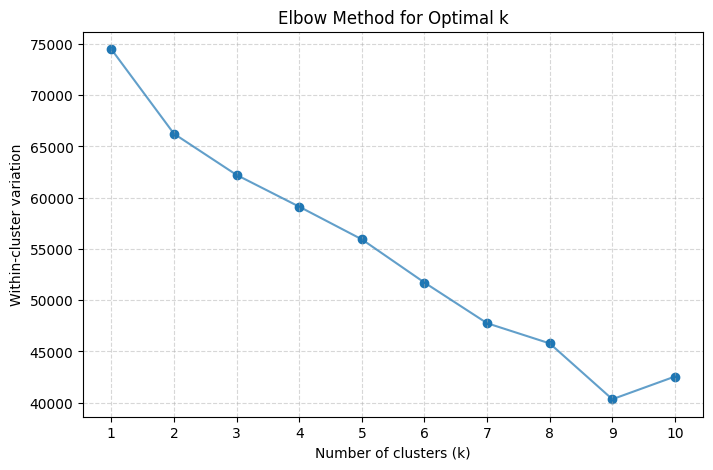

In [9]:
variations = kmc.k_means_assessment(X_gpu, 10)

# Run 50 times to get stable results for elbow method for k means cluster

In [ ]:
# n_restart = 50
# all_vars = []
# k_max = 40

# for _ in range(n_restart):
#     # this returns a length-5 np.array, one entry per k=1..5
#     vars = kmc.k_means_assessment(X = X_gpu, k = k_max)
#     all_vars.append(vars)

# # name the columns however you like:
# col_names = [f'k = {k}' for k in range(1, k_max + 1)]

# # build your DataFrame
# results_df = pd.DataFrame(all_vars, columns = col_names)

# Read the k results

In [ ]:
k_vars_csv_path = os.path.join(gr.global_paths['Data'], 'Processed Data Cache', 'variances.csv')
k_vars_df = gr.read_and_return_pd_df(k_vars_csv_path)

Reading files from: D:\ImportanFiles\Coding Related\Repositories\Quantitative-Investment-Algorithms\Data\Processed Data Cache\variances.csv


In [ ]:
display(k_vars_df)

,k = 1,k = 2,k = 3,k = 4,k = 5,k = 6,k = 7,k = 8,k = 9,k = 10,...,k = 31,k = 32,k = 33,k = 34,k = 35,k = 36,k = 37,k = 38,k = 39,k = 40
0,74494.0,66243.683594,62220.945312,58883.782227,53644.470703,49976.623047,47076.700195,45782.023193,42167.153748,37431.251709,...,23531.174858,23099.461266,21343.579185,22799.413719,22482.297447,20616.749290,22012.484947,20383.561089,20200.184929,20067.452736
1,74494.0,66243.683594,62221.089844,55561.473633,56165.405273,51562.601562,48815.093140,42404.200684,43933.208801,37432.284912,...,21778.434013,23018.766411,22872.120476,21064.493248,22505.171654,22328.578468,20413.969231,21874.195946,19954.338615,21521.748924
2,74494.0,66243.683594,59576.906250,55561.473633,53644.415039,51692.976562,48659.422607,45235.697998,43813.936768,37431.251709,...,23353.414146,23163.898140,22849.119682,22758.311455,22737.431145,20643.779091,20465.301445,20314.825798,21764.063805,21287.766304
3,74494.0,66243.683594,62220.945312,59125.502930,52461.499023,51702.468262,47892.277588,45234.539307,43805.271790,38129.281006,...,24056.772148,23228.869682,22995.538078,22754.834129,20886.225548,22370.013268,22191.447472,20259.960594,21857.345207,19967.675407
4,74494.0,66243.683594,62224.117188,59083.512817,53645.167969,51002.687744,48118.979492,43600.550995,43878.076416,38936.082031,...,23312.807457,23195.911034,23113.529045,22872.410576,20794.814445,22201.448387,22965.676453,21938.048637,21937.499596,21321.156578
5,74494.0,66243.683594,60736.416016,58886.847656,56147.063965,50934.383301,48613.120605,45849.814453,40332.117432,42550.145813,...,23490.106041,21902.831200,23108.732994,22791.837883,22589.256493,20616.396599,22360.038078,21966.989616,21699.737526,20125.515251
6,74494.0,66243.683594,60876.600586,59124.996094,52463.010742,51535.724121,48788.171631,42111.371582,43804.735901,42551.862366,...,21677.283318,23586.399864,21167.128746,22813.382103,20874.280449,22459.053398,22213.836601,21899.635185,20108.009651,21616.541740
7,74494.0,66243.683594,62224.009766,59124.996094,53783.769531,49977.423828,48387.125488,44694.242188,40429.423828,37432.856445,...,23373.452477,21953.468742,21447.164177,21227.260094,22686.598137,20658.688118,22277.827629,20253.773460,19945.650444,19993.644615
8,74494.0,66243.683594,62224.128906,59028.201172,56183.807129,50802.684082,48965.773438,45724.129639,43930.264893,38919.544189,...,21698.332787,22155.320976,21284.048027,22646.998680,22617.639488,20778.712639,21998.360832,20471.791344,21901.739891,20015.942650
9,74494.0,66243.683594,61004.887695,56725.793945,53918.484375,49976.546875,48797.921631,45198.818115,39217.677979,42550.124817,...,23246.402733,23116.148552,22902.961876,22790.712212,22559.517082,21123.622581,21949.753975,22081.478844,21797.103722,19845.934807


In [ ]:
means = k_vars_df.mean()
k = list(range(1, k_vars_df.shape[1] + 1))

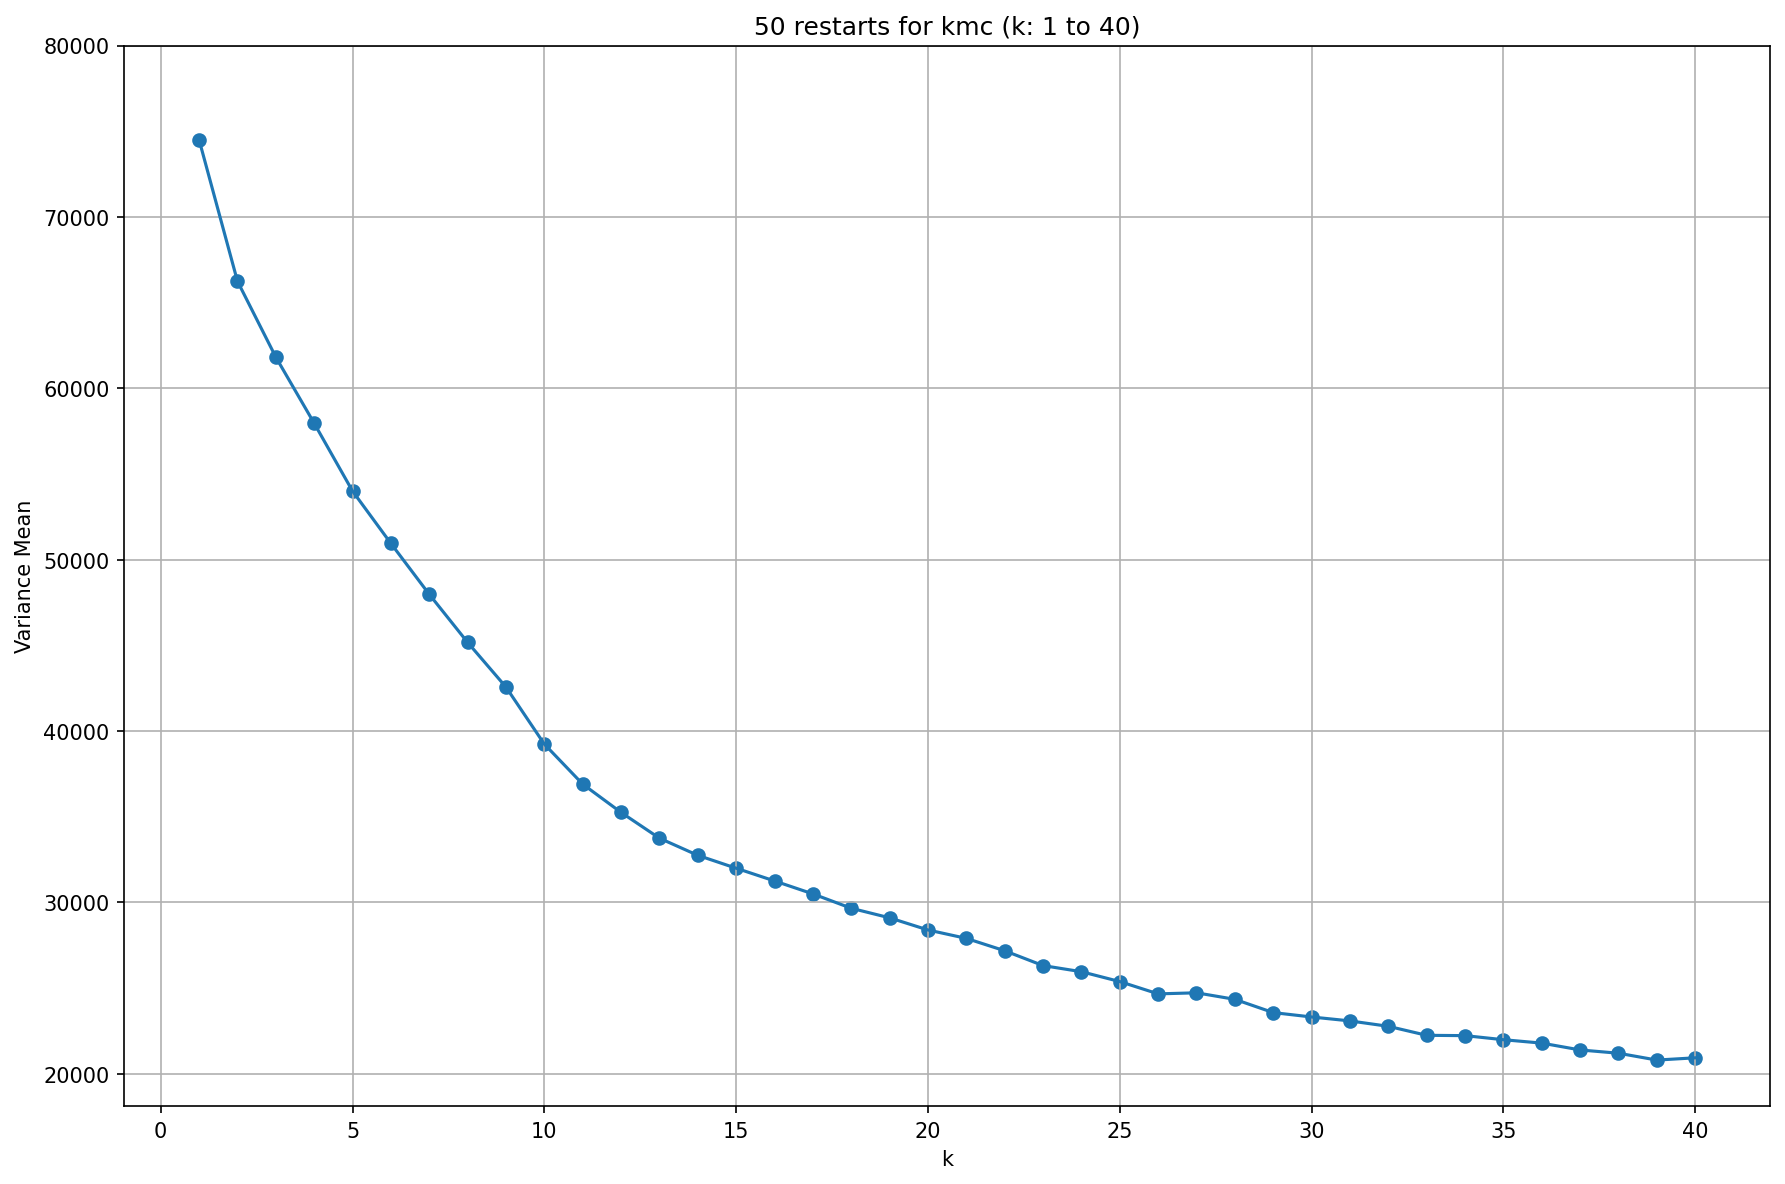

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8), dpi=150)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(k, means)
plt.plot(k, means)

ax.grid(True, which='major')
ax.set_xticks(np.arange(0, 41, 5))

min_y, max_y = means.min(), means.max()
y_start = (min_y // 10000) * 10000
y_end = ((max_y // 10000) + 1) * 10000
ax.set_yticks(np.arange(y_start, y_end + 1, 10000))

ax.set_xlabel('k')
ax.set_ylabel('Variance Mean')
ax.set_title('50 restarts for kmc (k: 1 to 40)')

plt.tight_layout()
plt.show()


In [ ]:
k_mean_df = pd.DataFrame({
    'k': k,
    'mean': means.values
})
k_mean_df = k_mean_df.sort_values('k').reset_index(drop=True)
k_mean_df['difference'] = k_mean_df['mean'].diff().abs()

In [ ]:
display(k_mean_df)

,k,mean,difference
0,1,74494.000000,NaN
1,2,66243.684219,8250.315781
2,3,61814.827915,4428.856304
3,4,57954.799976,3860.027939
4,5,53996.473762,3958.326213
5,6,50940.986484,3055.487278
6,7,47971.285387,2969.701097
7,8,45166.678500,2804.606887
8,9,42557.759159,2608.919342
9,10,39229.492275,3328.266884


In [ ]:
k_mean_df.drop([0], axis = 0, inplace = True)

In [ ]:
display(k_mean_df)

,k,mean,difference
1,2,66243.684219,8250.315781
2,3,61814.827915,4428.856304
3,4,57954.799976,3860.027939
4,5,53996.473762,3958.326213
5,6,50940.986484,3055.487278
6,7,47971.285387,2969.701097
7,8,45166.678500,2804.606887
8,9,42557.759159,2608.919342
9,10,39229.492275,3328.266884
10,11,36895.419897,2334.072378


In [ ]:
x = k_mean_df['k'].to_numpy()
y = k_mean_df['difference'].to_numpy()


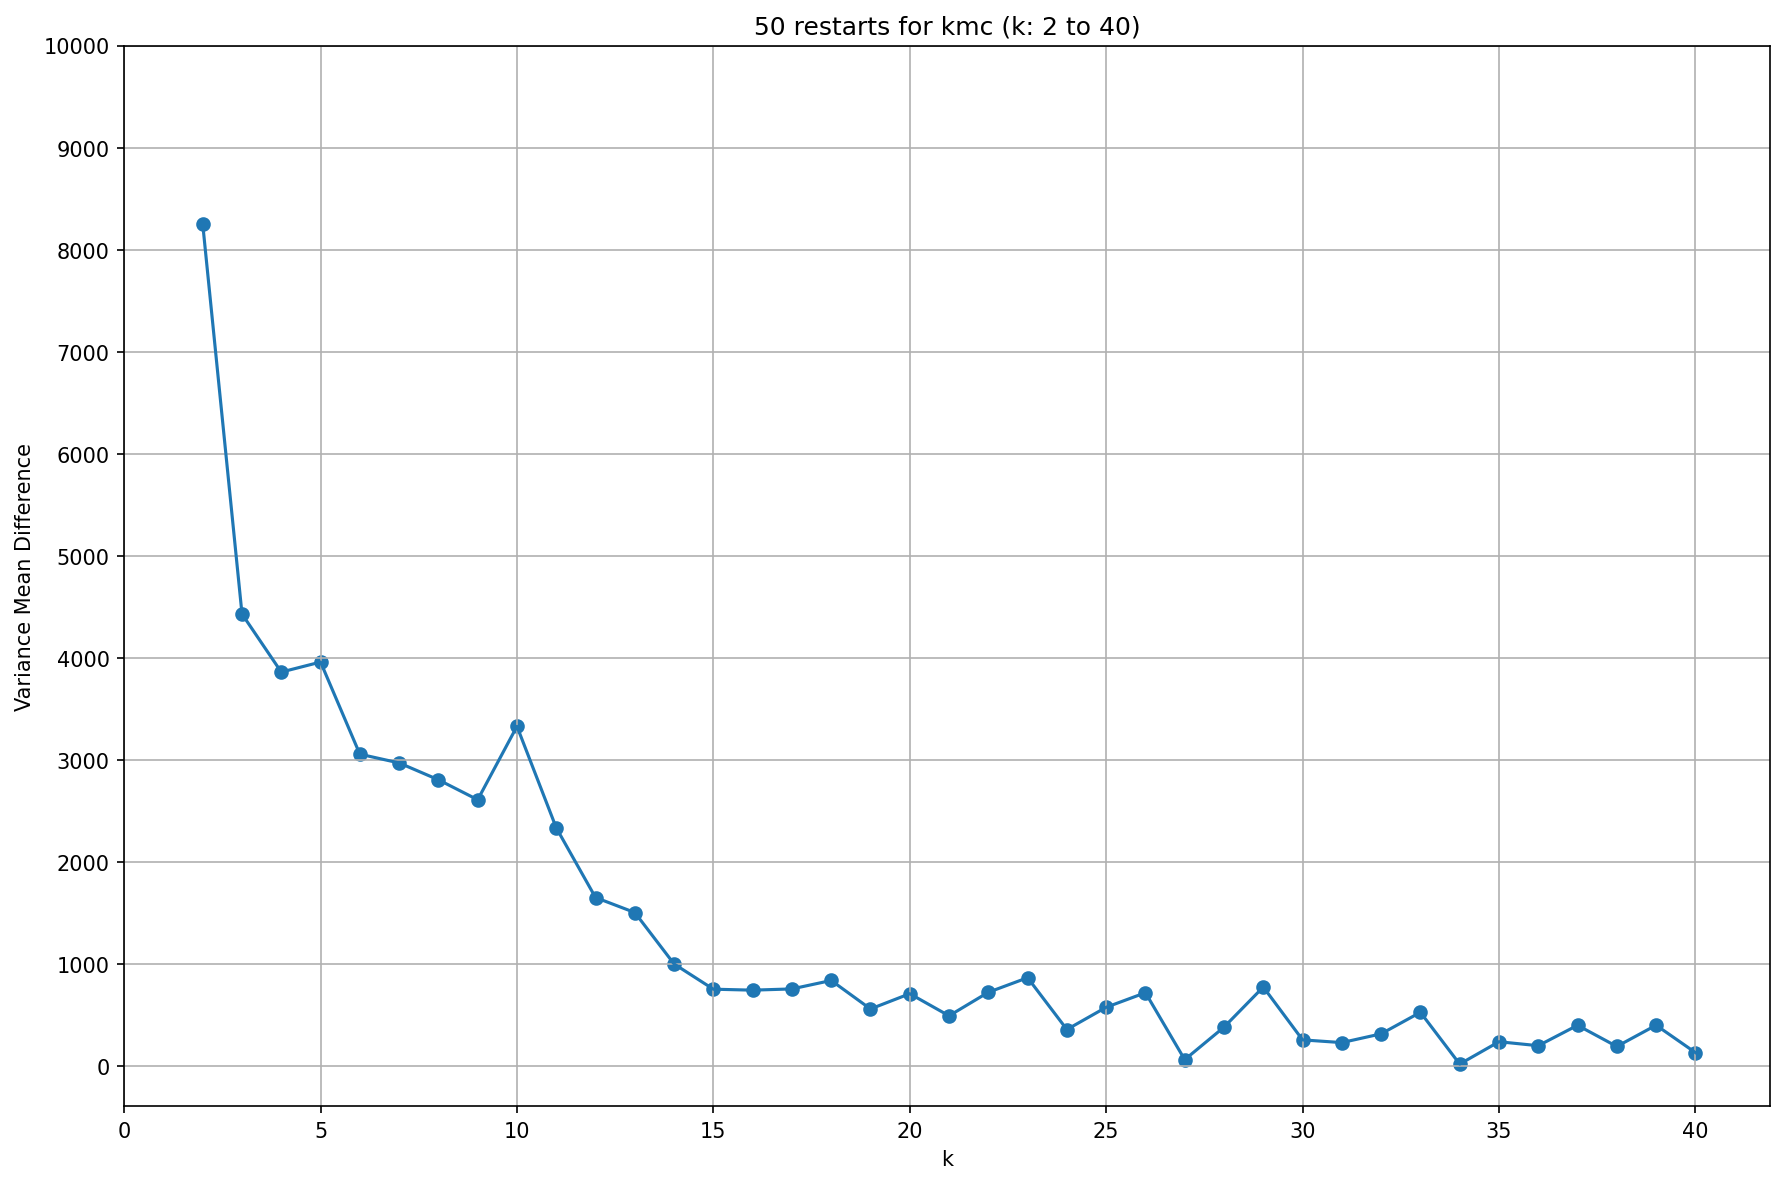

In [ ]:
fig = plt.figure(figsize=(12, 8), dpi=150)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
plt.plot(x, y)

ax.grid(True, which='major')
ax.set_xticks(np.arange(0, 41, 5))

min_y, max_y = y.min(), y.max()
y_start = (min_y // 10000) * 10000
y_end = ((max_y // 10000) + 1) * 10000
ax.set_yticks(np.arange(y_start, y_end + 1, 1000))

ax.set_xlabel('k')
ax.set_ylabel('Variance Mean Difference')
ax.set_title('50 restarts for kmc (k: 2 to 40)')

plt.tight_layout()
plt.show()